<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_16_Matplotlib Advanced Customization.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## 🟩 Job Postings Trend for Cloud Engineers (2.16.1)

**Problem Statement:**

Create a line plot showing the trend of job postings over the months for Cloud Engineer job postings:

- Create a new DataFrame called <code>df_ce</code> that filters only job postings that are 'Cloud Engineer'
- Customize the plot by setting the line style to dotted, the line color to purple, and the marker style to 'o'.
- Add a title 'Job Postings Trend for Data Analysts' and label the y-axis as 'Count of Job Postings'.

**Hint:**

Use the DataFrames <code>plot()</code> method to create the line plot and customize the line style, color, and marker style using the <code>linestyle</code>, <code>color</code>, and <code>marker</code> parameters.

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [18]:
df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')
df_month_ce = df_ce.groupby('job_posted_month').size()


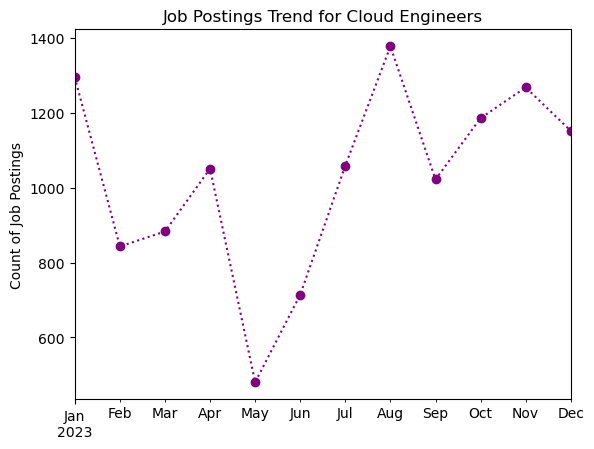

In [20]:
df_month_ce.plot(
 kind='line', 
 linestyle=':', 
 color='purple', 
 marker='o'
 )
plt.title('Job Postings Trend for Cloud Engineers')
plt.ylabel('Count of Job Postings')
plt.xlabel('')
plt.show()

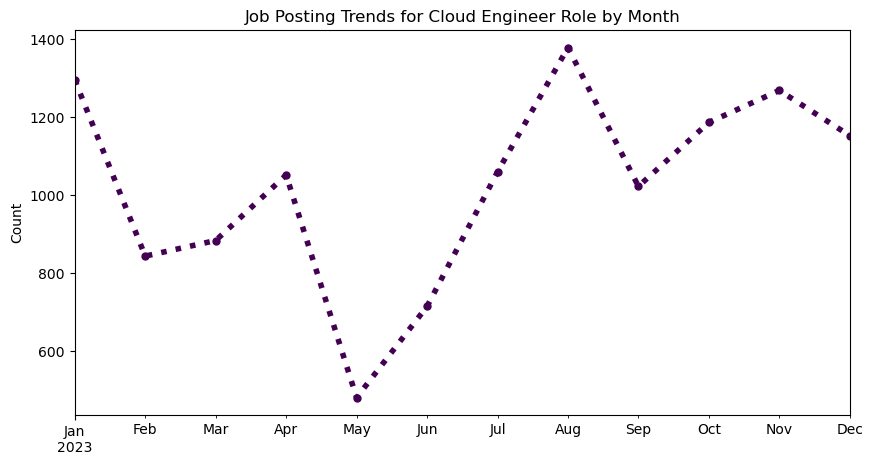

In [16]:
df_month_ce.plot(
    kind='line',
    linewidth=4,
    linestyle=':', # options: '-', '--', '-.', ':'
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' 
    markersize=5,
    marker='o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    figsize=(10, 5)
)

plt.title('Job Posting Trends for Cloud Engineer Role by Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

---

## 🟩 Customize Bar Chart (2.16.2)

**Problem Statement:**

Create a bar chart showing the top 5 job companies hiring for Senior Data Analyst roles:

- Create a DataFrame called <code>SDA_df</code>. 
- Customize the plot by setting the bar colors to 5 different colors with the variable <code>colors</code>.
- Add a grid to the y-axis only and making it dashes.
- Rotate the x-axis labels by 45 degrees.
- Label the y-axis as 'Number of Job Postings' and set the title to 'Top 5 Companies hiring Senior Data Analysts by Number of Postings'; Make the font size 14.

**Code Needed**

colors = ['blue', 'orange', 'green', 'red', 'purple']

**Hint:**

Use DataFrame method <code>plot()</code> to create the bar chart specifying the <code>color</code> paramater. Customize the grid using the <code>plt.grid()</code> function specifying the parameters of <code>axis</code> of 'y' and <code>linestyle</code> of '--'.

Text(0.5, 1.0, 'Top 5 Companies hiring Senior Data Analysts by Number of Postings')

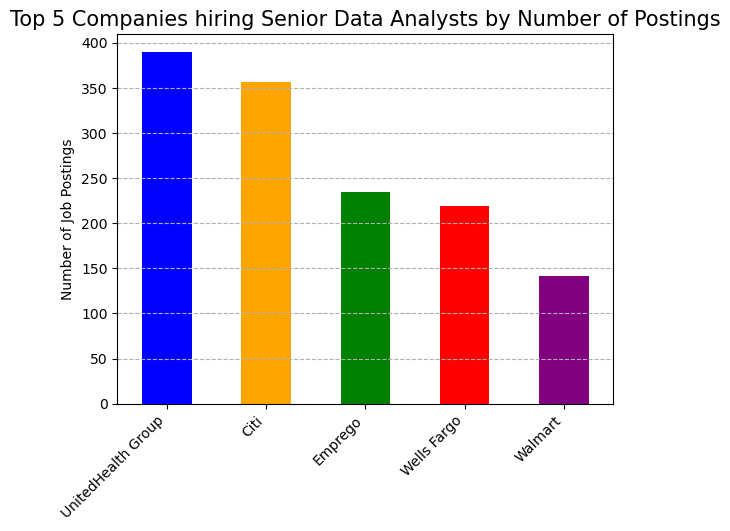

In [38]:
colors = ['blue', 'orange', 'green', 'red', 'purple']

SDA_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()

SDA_Top5 = SDA_df.groupby('company_name')['company_name'].value_counts().sort_values(ascending=False).head(5)
SDA_Top5
#company_name
SDA_Top5.plot(kind='bar', color=colors)
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.grid(axis='y', linestyle= '--')
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=15)

---